In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\sponer bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_sponer.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-12.3,-11.8,-12.3,-11.8,-12.0,-12.0,-11.4,-9.5,-11.5,...,-11.4,-9.5,-13.1,-11.8,-12.0,-11.2,-11.5,-9.5,-11.4,1
1,-11.5,-11.4,-9.5,-12.3,-12.0,-12.0,-10.6,-11.4,-12.3,-12.0,...,-11.5,-11.4,-12.0,-11.8,-12.3,-11.8,-12.3,-12.0,-10.6,1
2,-11.2,-10.6,-12.0,-12.3,-11.8,-12.3,-11.4,-12.0,-12.0,-11.5,...,-13.1,-9.5,-11.4,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3,1
3,-11.5,-13.2,-13.1,-9.5,-11.4,-12.0,-10.6,-12.0,-12.0,-11.2,...,-11.4,-12.3,-10.6,-12.3,-9.5,-11.4,-11.5,-13.2,-9.5,1
4,-11.2,-12.0,-10.6,-12.0,-11.4,-11.5,-12.0,-11.2,-11.8,-12.3,...,-13.1,-11.4,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-12.0,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-11.5,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-12.3,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.1,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.5,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-11.5,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-12.3,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.1,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.5,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.5,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3
14665,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-10.6,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8
14666,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-12.0,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3
14667,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-11.2,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-11.8,-11.2,-10.6,-11.4,-12.3,-10.6,-12.0,-12.0,-11.2,...,-13.2,-9.5,-13.1,-9.5,-9.5,-11.4,-12.0,-11.5,-11.8,0
1,-9.5,-11.4,-11.5,-11.4,-12.0,-11.5,-9.5,-11.4,-12.0,-11.8,...,-13.2,-9.5,-13.1,-13.2,-12.3,-10.6,-11.2,-11.8,-13.1,0
2,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,-11.8,-12.3,-12.0,-11.8,...,-12.0,-11.8,-12.3,-11.5,-13.2,-11.5,-12.0,-12.3,-11.4,0
3,-11.8,-12.3,-11.4,-12.0,-10.6,-12.0,-12.0,-12.3,-11.8,-12.0,...,-13.2,-11.5,-12.3,-13.2,-11.5,-12.0,-12.0,-11.2,-12.0,0
4,-12.0,-12.0,-11.5,-11.4,-11.8,-13.1,-13.2,-11.5,-11.4,-11.5,...,-11.4,-11.5,-12.3,-11.4,-10.6,-12.3,-11.4,-10.6,-11.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3,0
14665,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8,0
14666,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3,0
14667,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-11.575595
1,-79,-11.580183
2,-78,-11.595528
3,-77,-11.576174
4,-76,-11.584212
...,...,...
94,14,-11.557407
95,15,-11.563835
96,16,-11.568669
97,17,-11.542055


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-11.593490,150
1,-79,-11.604745,151
2,-78,-11.596176,152
3,-77,-11.602072,153
4,-76,-11.608037,154
...,...,...,...
94,14,-11.606265,244
95,15,-11.606619,245
96,16,-11.612973,246
97,17,-11.613573,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


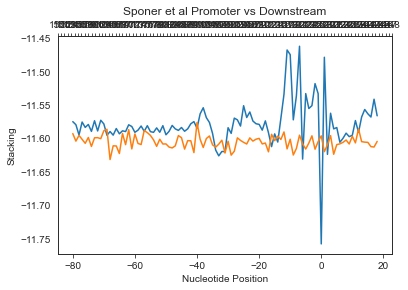

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Sponer et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-12.3,-11.8,-12.3,-11.8,-12.0,-12.0,-11.4,-9.5,-11.5,...,-11.4,-9.5,-13.1,-11.8,-12.0,-11.2,-11.5,-9.5,-11.4,1
1,-11.5,-11.4,-9.5,-12.3,-12.0,-12.0,-10.6,-11.4,-12.3,-12.0,...,-11.5,-11.4,-12.0,-11.8,-12.3,-11.8,-12.3,-12.0,-10.6,1
2,-11.2,-10.6,-12.0,-12.3,-11.8,-12.3,-11.4,-12.0,-12.0,-11.5,...,-13.1,-9.5,-11.4,-10.6,-12.3,-11.8,-12.0,-12.0,-12.3,1
3,-11.5,-13.2,-13.1,-9.5,-11.4,-12.0,-10.6,-12.0,-12.0,-11.2,...,-11.4,-12.3,-10.6,-12.3,-9.5,-11.4,-11.5,-13.2,-9.5,1
4,-11.2,-12.0,-10.6,-12.0,-11.4,-11.5,-12.0,-11.2,-11.8,-12.3,...,-13.1,-11.4,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-10.6,-12.0,-12.3,-13.2,-11.5,-12.3,-9.5,-11.8,-12.0,-12.3,...,-11.4,-11.5,-11.8,-12.0,-12.3,-13.2,-9.5,-9.5,-12.3,0
29334,-11.4,-12.0,-11.5,-11.8,-11.4,-12.3,-11.8,-9.5,-12.3,-11.5,...,-12.0,-11.2,-11.8,-11.5,-11.4,-9.5,-11.5,-11.2,-11.8,0
29335,-12.0,-12.0,-12.0,-12.0,-12.3,-9.5,-13.2,-13.1,-11.8,-11.2,...,-11.2,-11.5,-11.4,-11.8,-12.3,-11.5,-11.8,-12.0,-12.3,0
29336,-13.1,-11.4,-12.0,-10.6,-12.3,-9.5,-11.4,-12.0,-11.5,-11.4,...,-10.6,-12.0,-12.0,-12.0,-12.0,-11.2,-11.8,-12.3,-11.8,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve,auc, RocCurveDisplay
from statistics import mean
import sklearn.metrics as metrics
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [27]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [28]:
feature_list=list(X_train.columns)

In [29]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [30]:
X.shape

(29338, 99)

## Model Training

In [31]:
kfold = KFold(n_splits=10, shuffle=True)
clf = svm.SVC(kernel='rbf')
fold_no = 1

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)
    
    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.7137014314928425, Precision: 0.7139055222887558, Recall: 0.7235333782872556, F1 Score: 0.7186872069658407, MCC: 0.4272893004658747, Specificity: 0.7036526533425224
Fold 2: Accuracy: 0.7004089979550102, Precision: 0.6857142857142857, Recall: 0.7277739490006891, F1 Score: 0.7061183550651956, MCC: 0.40188247713132647, Specificity: 0.6736345246122725
Fold 3: Accuracy: 0.6987048398091343, Precision: 0.6877742946708464, Recall: 0.7397167902899529, F1 Score: 0.7128005198180637, MCC: 0.39799952158461765, Specificity: 0.656788421778084
Fold 4: Accuracy: 0.712678936605317, Precision: 0.7058823529411765, Recall: 0.7424344317417619, F1 Score: 0.7236971484759096, MCC: 0.4254268834873096, Specificity: 0.6821008984105045
Fold 5: Accuracy: 0.7024539877300614, Precision: 0.6885139519792343, Recall: 0.7297111416781293, F1 Score: 0.7085141903171953, MCC: 0.40588762019523006, Specificity: 0.6756756756756757
Fold 6: Accuracy: 0.7007498295841854, Precision: 0.6884933248569612, Recall: 0.

In [32]:
accuracy_list

[0.7137014314928425,
 0.7004089979550102,
 0.6987048398091343,
 0.712678936605317,
 0.7024539877300614,
 0.7007498295841854,
 0.7102931152010906,
 0.7130197682344922,
 0.7040572792362768,
 0.7016706443914081]

In [33]:
precision_list

[0.7139055222887558,
 0.6857142857142857,
 0.6877742946708464,
 0.7058823529411765,
 0.6885139519792343,
 0.6884933248569612,
 0.7014248704663213,
 0.6958466453674121,
 0.6839684625492772,
 0.6950127877237852]

In [34]:
recall_list

[0.7235333782872556,
 0.7277739490006891,
 0.7397167902899529,
 0.7424344317417619,
 0.7297111416781293,
 0.7362338545207342,
 0.735733695652174,
 0.7484536082474227,
 0.7289915966386554,
 0.731986531986532]

In [35]:
specificity_list

[0.7036526533425224,
 0.6736345246122725,
 0.656788421778084,
 0.6821008984105045,
 0.6756756756756757,
 0.6650717703349283,
 0.6846785225718194,
 0.6781609195402298,
 0.6803986710963456,
 0.6705801104972375]

In [36]:
f1_score_list 

[0.7186872069658407,
 0.7061183550651956,
 0.7128005198180637,
 0.7236971484759096,
 0.7085141903171953,
 0.7115637319316689,
 0.7181697612732095,
 0.7211920529801324,
 0.7057627118644068,
 0.713020662512299]

In [37]:
mcc_list

[0.4272893004658747,
 0.40188247713132647,
 0.39799952158461765,
 0.4254268834873096,
 0.40588762019523006,
 0.4023558522730658,
 0.4209900896388846,
 0.42755533444878113,
 0.4095425543942204,
 0.40342721747533733]

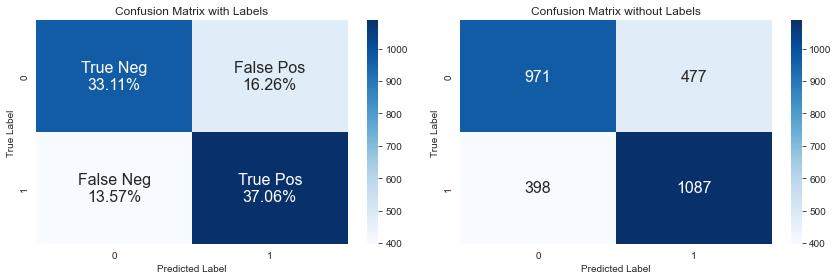

In [38]:
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [39]:
print(mean(accuracy_list))

0.7057738830239819


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


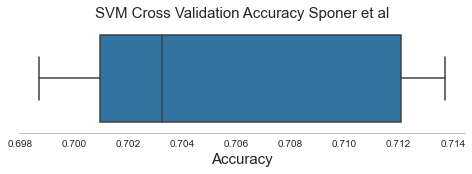

In [40]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('SVM Cross Validation Accuracy Sponer et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


In [41]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.7016706443914081
Precision: 0.6950127877237852
Recall: 0.731986531986532
f1_score: 0.713020662512299


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


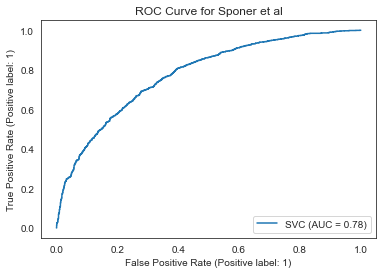

In [42]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Sponer et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


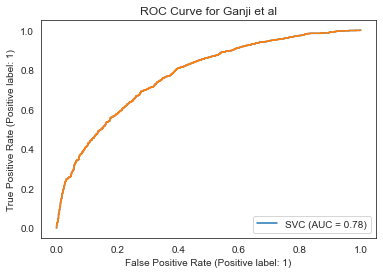

In [43]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_sponer_svm_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [65]:
!pip install shap

In [66]:
import shap


In [67]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [68]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[8081, 2132, 8982, 4223, 9217, 7124, 339, 9222, 9621, 4958, 2580, 3559, 6928, 7030, 6772, 9517, 156, 3509, 5088, 5143, 7997, 6396, 2568, 1593, 9692, 5680, 3230, 4048, 2484, 9609, 1561, 8603, 9344, 2240, 4419, 2961, 8854, 1297, 6368, 1698]


In [69]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [70]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [71]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [72]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

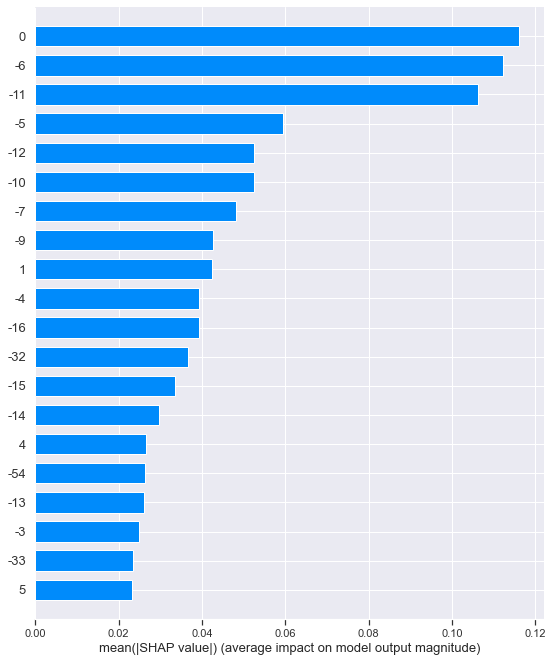

In [73]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

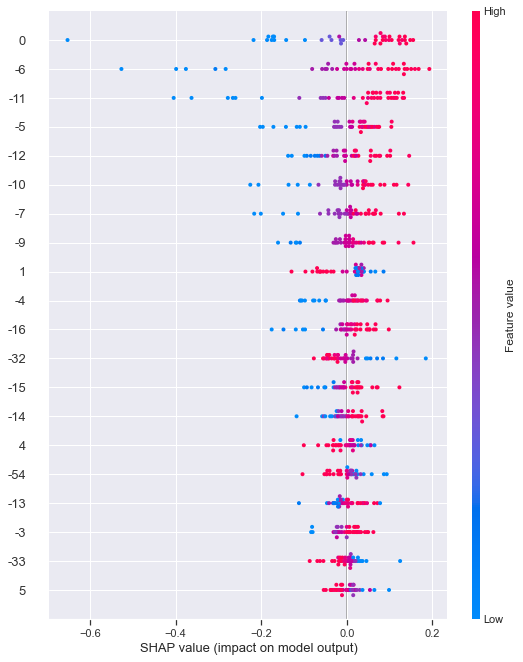

In [74]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

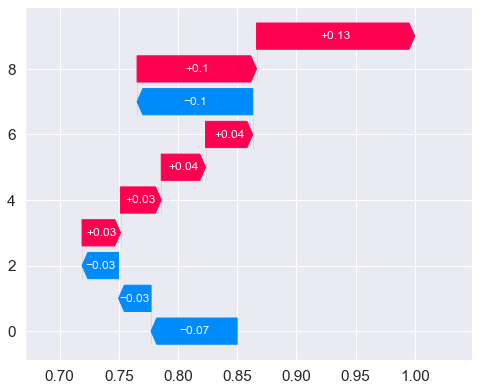

In [75]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [76]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [77]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [44]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\sponer\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\sponer\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\sponer\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\sponer\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [45]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Sponer Test Organism')]

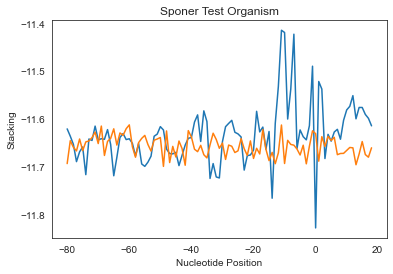

In [46]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Sponer Test Organism')

## Test Labels

In [47]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [48]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [49]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7707792207792208


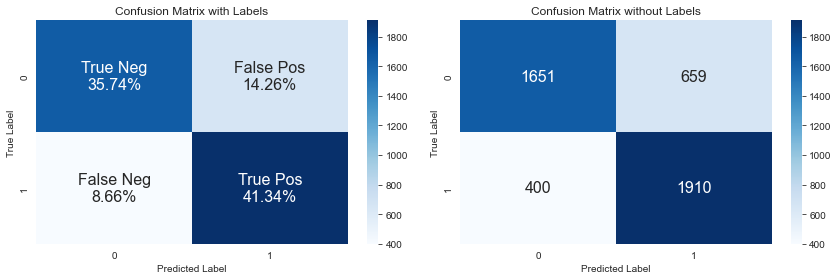

In [50]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [52]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8008658008658008, Precision: 0.7836734693877551, Recall: 0.8311688311688312, F1 Score: 0.8067226890756303, MCC: 0.6028397639994955, Specificity: 0.7705627705627706
Fold 2/10
 Accuracy: 0.7489177489177489, Precision: 0.7137546468401487, Recall: 0.8311688311688312, F1 Score: 0.7680000000000001, MCC: 0.5047113204196659, Specificity: 0.6666666666666666
Fold 3/10
 Accuracy: 0.7294372294372294, Precision: 0.7038461538461539, Recall: 0.7922077922077922, F1 Score: 0.7454175152749491, MCC: 0.46253383400667447, Specificity: 0.6666666666666666
Fold 4/10
 Accuracy: 0.7683982683982684, Precision: 0.746031746031746, Recall: 0.8138528138528138, F1 Score: 0.7784679089026915, MCC: 0.5390285486558778, Specificity: 0.7229437229437229
Fold 5/10
 Accuracy: 0.7878787878787878, Precision: 0.7782426778242678, Recall: 0.8051948051948052, F1 Score: 0.7914893617021277, MCC: 0.5761031620889244, Specificity: 0.7705627705627706
Fold 6/10
 Accuracy: 0.7619047619047619, Precision: 0.74297188755

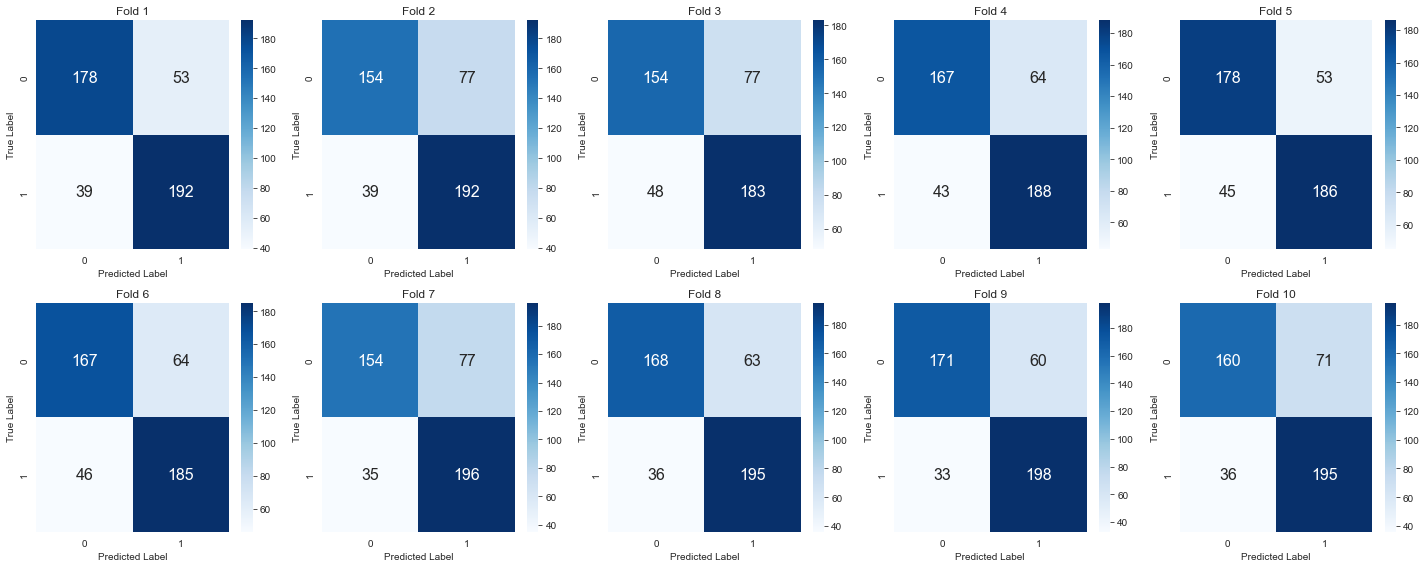

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [54]:
test_accuracy

[0.8008658008658008,
 0.7489177489177489,
 0.7294372294372294,
 0.7683982683982684,
 0.7878787878787878,
 0.7619047619047619,
 0.7575757575757576,
 0.7857142857142857,
 0.7987012987012987,
 0.7683982683982684]

In [55]:
test_precision

[0.7836734693877551,
 0.7137546468401487,
 0.7038461538461539,
 0.746031746031746,
 0.7782426778242678,
 0.7429718875502008,
 0.717948717948718,
 0.7558139534883721,
 0.7674418604651163,
 0.7330827067669173]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [56]:
test_recall

[0.8311688311688312,
 0.8311688311688312,
 0.7922077922077922,
 0.8138528138528138,
 0.8051948051948052,
 0.8008658008658008,
 0.8484848484848485,
 0.8441558441558441,
 0.8571428571428571,
 0.8441558441558441]

In [57]:
test_specificity

[0.7705627705627706,
 0.6666666666666666,
 0.6666666666666666,
 0.7229437229437229,
 0.7705627705627706,
 0.7229437229437229,
 0.6666666666666666,
 0.7272727272727273,
 0.7402597402597403,
 0.6926406926406926]

In [58]:
test_f1_score

[0.8067226890756303,
 0.7680000000000001,
 0.7454175152749491,
 0.7784679089026915,
 0.7914893617021277,
 0.7708333333333334,
 0.7777777777777778,
 0.7975460122699386,
 0.8098159509202453,
 0.7847082494969818]

In [59]:
test_mcc

[0.6028397639994955,
 0.5047113204196659,
 0.46253383400667447,
 0.5390285486558778,
 0.5761031620889244,
 0.5254070489399766,
 0.5238835186571609,
 0.5753723590625356,
 0.6015256481108326,
 0.5430662721152554]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [60]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense sponer promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.2,-11.5,-9.5,-11.4,-10.6,-12.0,-11.4,-11.5,-12.0,-12.0,...,-9.5,-12.3,-12.0,-12.0,-12.0,-11.5,-11.4,-12.0,-11.5,1
1,-11.4,-12.0,-11.5,-13.2,-13.1,-11.4,-10.6,-11.2,-12.0,-11.5,...,-12.0,-11.5,-13.2,-12.3,-10.6,-11.4,-9.5,-12.3,-12.0,1
2,-12.0,-11.4,-12.3,-10.6,-12.3,-11.4,-10.6,-11.2,-10.6,-11.2,...,-11.5,-13.2,-11.5,-11.4,-13.1,-11.8,-11.2,-12.0,-12.0,1
3,-11.4,-11.5,-11.2,-11.5,-11.4,-12.0,-11.5,-13.2,-11.5,-12.3,...,-12.3,-9.5,-11.4,-11.5,-11.4,-12.0,-12.0,-10.6,-12.3,1
4,-11.5,-9.5,-11.8,-11.2,-12.0,-12.0,-10.6,-11.2,-11.8,-9.5,...,-12.3,-11.5,-9.5,-13.2,-9.5,-9.5,-11.5,-11.4,-11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-13.1,-11.8,-12.0,-12.0,-11.4,-9.5,-9.5,-9.5,-11.5,-12.0,...,-12.0,-11.4,-12.3,-10.6,-11.4,-13.1,-11.8,-11.4,-9.5,0
12164,-12.0,-11.4,-11.5,-12.0,-11.4,-13.1,-9.5,-11.8,-12.3,-13.2,...,-11.8,-9.5,-13.1,-9.5,-11.4,-11.5,-13.2,-13.1,-11.4,0
12165,-11.5,-12.3,-11.4,-10.6,-12.3,-9.5,-9.5,-9.5,-11.4,-11.5,...,-11.8,-11.5,-11.2,-12.0,-11.8,-12.3,-11.5,-13.2,-9.5,0
12166,-12.0,-11.5,-11.4,-10.6,-12.0,-12.3,-13.2,-13.1,-9.5,-9.5,...,-9.5,-9.5,-11.4,-11.8,-11.5,-12.0,-12.0,-11.2,-11.5,0


In [61]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [62]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.6417419884963024, Precision: 0.6133682830930537, Recall: 0.7684729064039408, F1 Score: 0.6822157434402331, MCC: 0.2928729849584385, Specificity: 0.6926406926406926
Fold 2/10
 Accuracy: 0.6400986031224322, Precision: 0.6078184110970997, Recall: 0.7914614121510674, F1 Score: 0.6875891583452213, MCC: 0.29377759934671493, Specificity: 0.5148026315789473
Fold 3/10
 Accuracy: 0.6400986031224322, Precision: 0.61003861003861, Recall: 0.7783251231527094, F1 Score: 0.683982683982684, MCC: 0.2913633141568118, Specificity: 0.48848684210526316
Fold 4/10
 Accuracy: 0.6606409202958093, Precision: 0.6282722513089005, Recall: 0.7881773399014779, F1 Score: 0.6991988346686089, MCC: 0.33209871318063516, Specificity: 0.5016447368421053
Fold 5/10
 Accuracy: 0.657354149548069, Precision: 0.6245110821382008, Recall: 0.787828947368421, F1 Score: 0.6967272727272728, MCC: 0.32618219234514345, Specificity: 0.5328947368421053
Fold 6/10
 Accuracy: 0.6499589153656532, Precision: 0.616966580976

In [63]:
antisense_accuracy

[0.6417419884963024,
 0.6400986031224322,
 0.6400986031224322,
 0.6606409202958093,
 0.657354149548069,
 0.6499589153656532,
 0.6343467543138867,
 0.6368118323746919,
 0.634046052631579,
 0.6422697368421053]

In [64]:
antisense_precision

[0.6133682830930537,
 0.6078184110970997,
 0.61003861003861,
 0.6282722513089005,
 0.6245110821382008,
 0.6169665809768637,
 0.607661822985469,
 0.6069587628865979,
 0.6082337317397079,
 0.6116129032258064]

In [65]:
antisense_recall

[0.7684729064039408,
 0.7914614121510674,
 0.7783251231527094,
 0.7881773399014779,
 0.787828947368421,
 0.7894736842105263,
 0.756578947368421,
 0.774671052631579,
 0.7532894736842105,
 0.7796052631578947]

In [66]:
antisense_specificity

[0.6926406926406926,
 0.5148026315789473,
 0.48848684210526316,
 0.5016447368421053,
 0.5328947368421053,
 0.5270935960591133,
 0.5106732348111659,
 0.5123152709359606,
 0.49917898193760263,
 0.5148026315789473]

In [67]:
antisense_f1_score

[0.6822157434402331,
 0.6875891583452213,
 0.683982683982684,
 0.6991988346686089,
 0.6967272727272728,
 0.6926406926406926,
 0.6739926739926739,
 0.680635838150289,
 0.6730345334313006,
 0.685466377440347]

In [68]:
antisense_mcc

[0.2928729849584385,
 0.29377759934671493,
 0.2913633141568118,
 0.33209871318063516,
 0.32618219234514345,
 0.312516007248916,
 0.2772777649017332,
 0.2848544974069108,
 0.2760575445815583,
 0.2959211166726863]

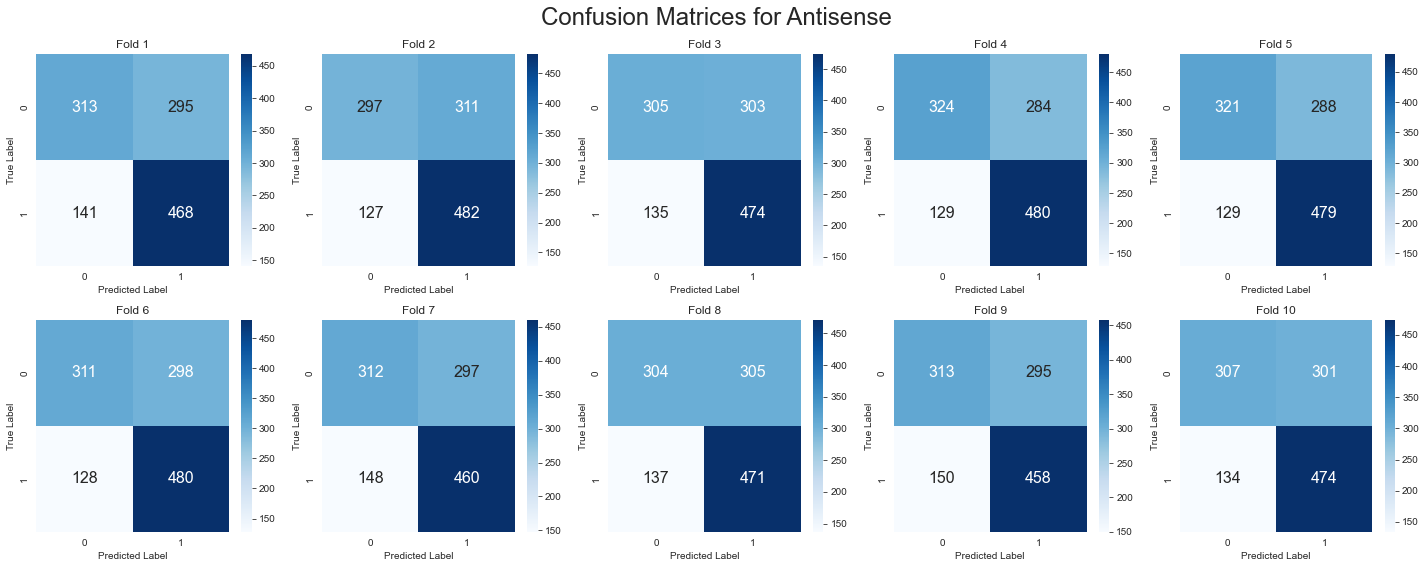

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [70]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced sponer promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-11.5,-11.4,-13.1,-11.8,-11.2,-11.8,-13.1,-9.5,-9.5,-11.4,...,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-10.6,-11.4,-12.3,1
1,-10.6,-11.4,-12.3,-12.0,-12.0,-10.6,-12.0,-12.0,-11.2,-11.8,...,-12.3,-11.5,-13.2,-11.5,-12.0,-11.2,-10.6,-12.3,-13.2,1
2,-9.5,-9.5,-13.2,-9.5,-12.3,-10.6,-12.3,-13.2,-12.3,-11.5,...,-11.5,-13.2,-12.3,-12.0,-10.6,-12.0,-12.3,-13.2,-11.5,1
3,-11.8,-12.3,-12.0,-11.8,-11.5,-12.3,-11.4,-10.6,-12.0,-11.2,...,-12.0,-12.0,-11.8,-13.1,-11.4,-12.0,-12.0,-10.6,-11.4,1
4,-11.5,-11.4,-11.5,-12.0,-12.0,-11.2,-12.0,-12.0,-10.6,-11.4,...,-11.8,-12.3,-12.0,-11.5,-11.4,-12.0,-12.0,-12.0,-10.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-9.5,-13.2,-9.5,-9.5,-12.3,-11.8,-13.1,-9.5,-13.2,-13.1,...,-12.3,-12.0,-11.8,-11.5,-11.4,-9.5,-9.5,-13.1,-9.5,0
12126,-9.5,-13.1,-11.4,-11.8,-13.1,-13.2,-12.3,-12.0,-11.5,-13.2,...,-9.5,-13.2,-13.1,-11.4,-12.0,-11.8,-9.5,-13.1,-13.2,0
12127,-12.0,-11.5,-11.4,-12.0,-11.5,-11.4,-11.8,-9.5,-13.1,-11.4,...,-12.3,-11.8,-13.1,-13.2,-9.5,-12.3,-11.8,-9.5,-12.3,0
12128,-13.2,-9.5,-13.1,-11.4,-12.0,-11.5,-11.4,-11.8,-9.5,-12.3,...,-13.2,-13.1,-9.5,-11.4,-10.6,-11.4,-13.1,-9.5,-13.2,0


In [71]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [72]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.6356141797197032, Precision: 0.6251896813353566, Recall: 0.6787479406919276, F1 Score: 0.65086887835703, MCC: 0.27217872742858734, Specificity: 0.5049342105263158
Fold 2/10
 Accuracy: 0.6372629843363561, Precision: 0.624813153961136, Recall: 0.6886326194398682, F1 Score: 0.6551724137931034, MCC: 0.27591001129268106, Specificity: 0.5924092409240924
Fold 3/10
 Accuracy: 0.6413849958779885, Precision: 0.6279761904761905, Recall: 0.6952224052718287, F1 Score: 0.6598905394839719, MCC: 0.2843441120826646, Specificity: 0.5858085808580858
Fold 4/10
 Accuracy: 0.6661170651277823, Precision: 0.6521084337349398, Recall: 0.71334431630972, F1 Score: 0.6813532651455548, MCC: 0.3336589707649529, Specificity: 0.5874587458745875
Fold 5/10
 Accuracy: 0.6215993404781534, Precision: 0.6091445427728613, Recall: 0.6803953871499177, F1 Score: 0.6428015564202334, MCC: 0.24480869572658587, Specificity: 0.6188118811881188
Fold 6/10
 Accuracy: 0.6595218466611706, Precision: 0.6433878157503

In [73]:
internal_accuracy

[0.6356141797197032,
 0.6372629843363561,
 0.6413849958779885,
 0.6661170651277823,
 0.6215993404781534,
 0.6595218466611706,
 0.6397361912613355,
 0.6183017312448474,
 0.6446826051112943,
 0.6529266281945589]

In [74]:
internal_precision

[0.6251896813353566,
 0.624813153961136,
 0.6279761904761905,
 0.6521084337349398,
 0.6091445427728613,
 0.6433878157503715,
 0.6229985443959243,
 0.6031746031746031,
 0.6284875183553598,
 0.6416539050535988]

In [75]:
internal_recall

[0.6787479406919276,
 0.6886326194398682,
 0.6952224052718287,
 0.71334431630972,
 0.6803953871499177,
 0.7145214521452146,
 0.7062706270627063,
 0.6897689768976898,
 0.7062706270627063,
 0.6914191419141914]

In [76]:
internal_specificity

[0.5049342105263158,
 0.5924092409240924,
 0.5858085808580858,
 0.5874587458745875,
 0.6188118811881188,
 0.5627062706270627,
 0.6046128500823723,
 0.5733113673805601,
 0.5469522240527183,
 0.5831960461285008]

In [78]:
internal_f1_score

[0.65086887835703,
 0.6551724137931034,
 0.6598905394839719,
 0.6813532651455548,
 0.6428015564202334,
 0.6770914777169665,
 0.6620262954369683,
 0.6435719784449576,
 0.6651126651126652,
 0.6656076250992851]

In [79]:
internal_mcc

[0.27217872742858734,
 0.27591001129268106,
 0.2843441120826646,
 0.3336589707649529,
 0.24480869572658587,
 0.32107000333055763,
 0.2820776102747898,
 0.23916604617112847,
 0.29167543575834265,
 0.30681966945799005]

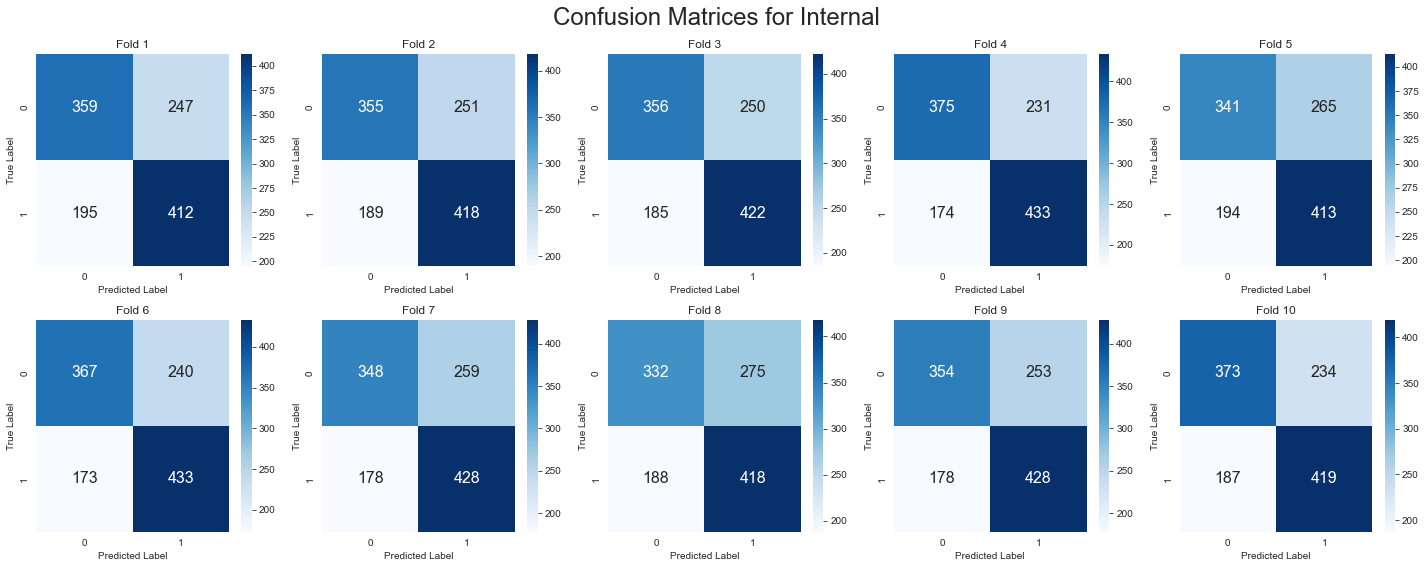

In [80]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
